In [1]:
import numpy as np

from models import KNN, DecisionTree, preprocessing, RandomForest
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, heatmaps, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv, plot_cluster_by_model
from typing import get_args
from pprint import pprint
import seaborn as sns

sns.set_theme(style="whitegrid")

# load data

In [2]:
# Load data
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


# Data preprocessing

In [4]:
target_column = 'Fertility'
normalization_type = 'z-score'

In [5]:
X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)

                N           P           K          pH          EC          OC  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean   250.166795    8.893743  498.353545    7.473827    0.544188    0.591219   
std     72.293371    2.951544  118.450293    0.213522    0.140689    0.296291   
min     50.000000    2.900000  222.000000    7.000000    0.200000    0.100000   
25%    201.000000    6.800000  412.000000    7.350000    0.430000    0.380000   
50%    257.000000    8.100000  475.000000    7.500000    0.546842    0.590000   
75%    307.000000   10.700000  578.250000    7.600000    0.640000    0.780000   
max    383.000000   16.000000  834.000000    7.960000    0.950000    1.270000   

                S          Zn          Fe          Cu          Mn           B  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean     6.673031    0.377294    4.059498    0.950096    8.434112    0.413222   
std      2.372884    0.1191

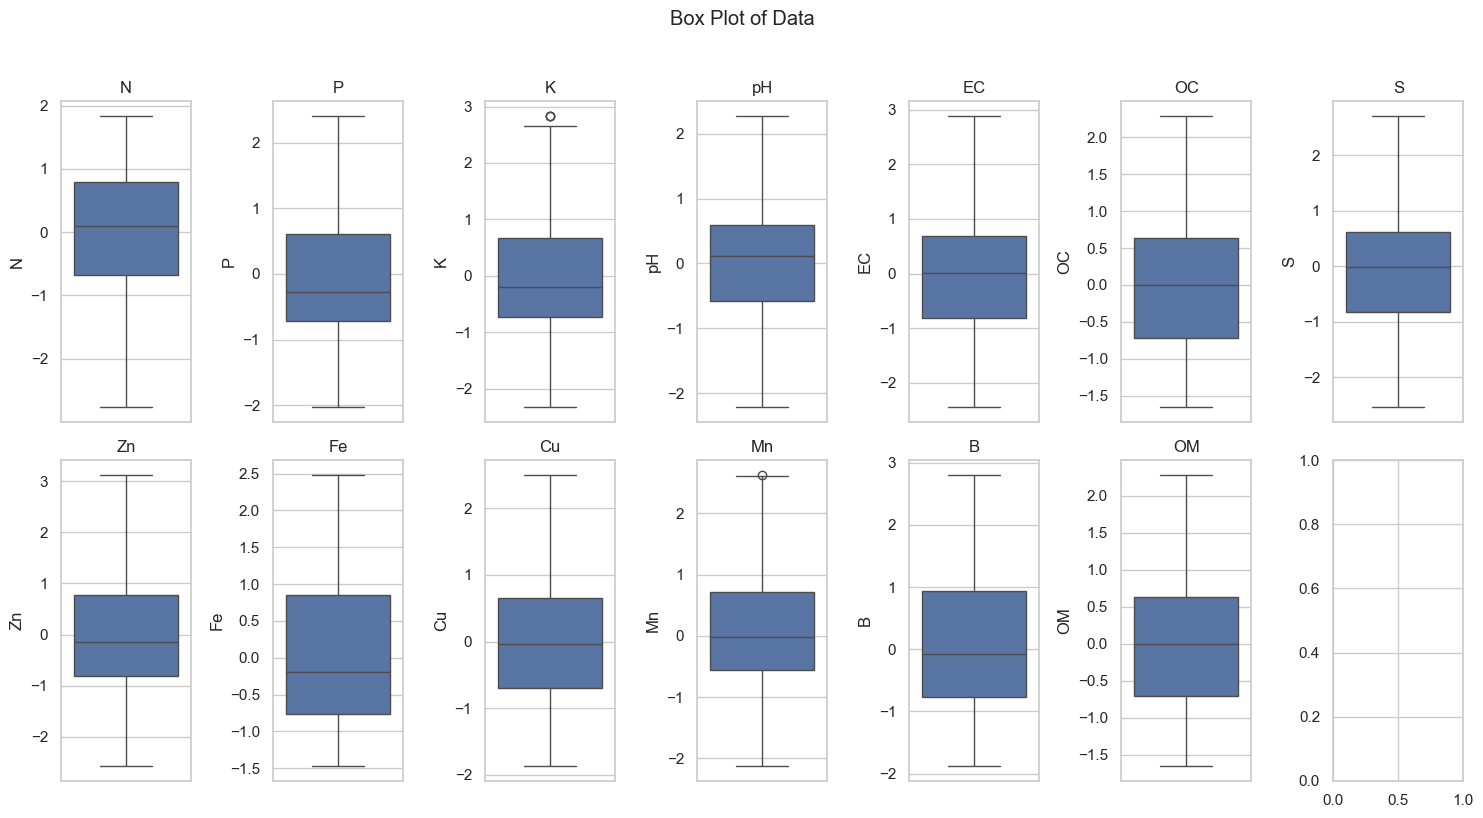

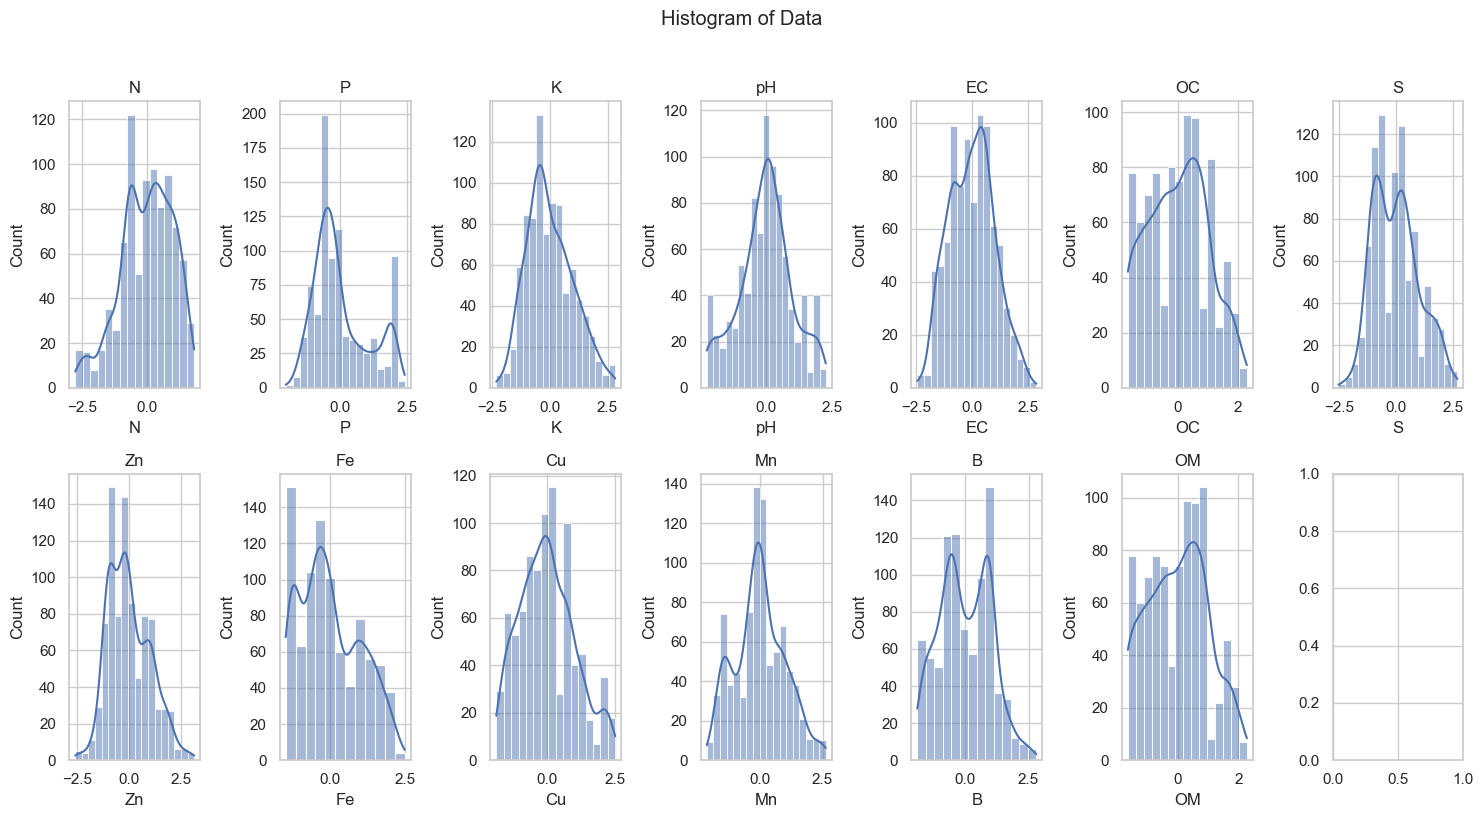

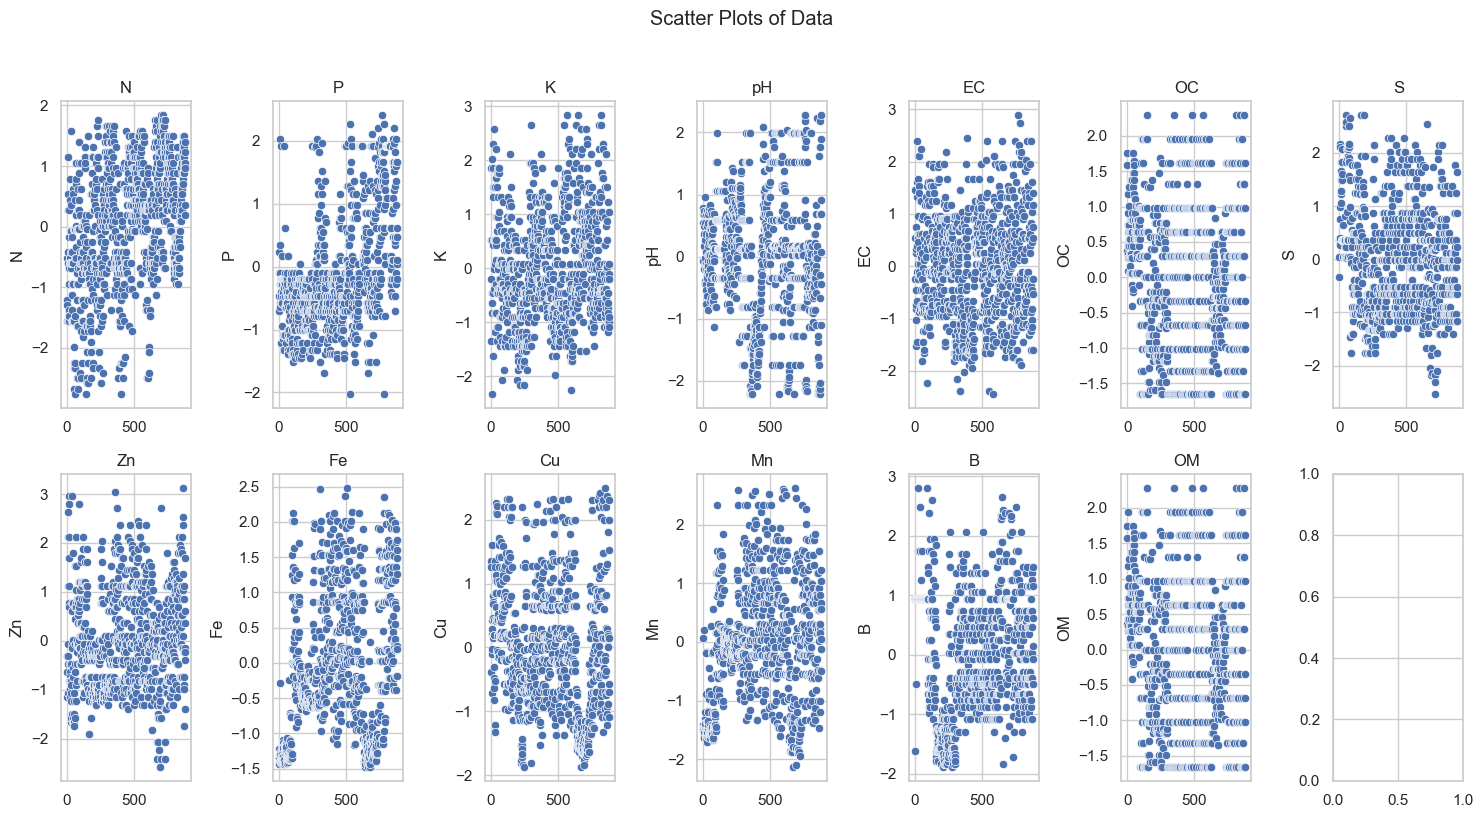

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# KNN

In [10]:
for strategy in strategies:
    knn = KNN(k=3, strategy=strategy)
    knn.fit(X_train, Y_train)
    print(f'Accuracy for {strategy} strategy: {knn.score(X_test, Y_test, metric="accuracy")}')

Accuracy for euclidean strategy: 0.75
Accuracy for manhattan strategy: 0.7727272727272727
Accuracy for minkowski strategy: 0.75
Accuracy for cosine strategy: 0.7556818181818182
Accuracy for hamming strategy: 0.5909090909090909


# Decision tree

In [11]:
# tree = DecisionTree()
# tree.fit(X_train, Y_train)
# print(f'Accuracy for decision tree: {tree.score(X_test, Y_test, metric="accuracy")}')

# Random forest

In [12]:
# random_forest = RandomForest(n_trees=2)
# random_forest.fit(X, Y)
# print(f'Accuracy for random forest: {random_forest.score(X_test, Y_test, metric="accuracy")}')

# Search for best parameters using grid search

In [13]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

<h4>Knn</h4>

In [14]:
parameters = {'k': [1, 3, 5, 7], 'strategy': strategies.keys()}
results, best_results = grid_search_cv(KNN, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'k': 1, 'strategy': 'manhattan'},
 'best_score': 0.6026536196595691}


,model,accuracy,precision,recall,f1-score,specificity
0,"KNN(strategy=euclidean_distance, k=1)",0.724823,0.639825,0.572830,0.582310,0.831237
1,"KNN(strategy=manhattan_distance, k=1)",0.717730,0.606283,0.622037,0.602654,0.827390
2,"KNN(strategy=minkowski_distance, k=1)",0.729078,0.603903,0.586069,0.579978,0.834306
3,"KNN(strategy=cosine_distance, k=1)",0.719149,0.595213,0.589924,0.588259,0.830666
4,"KNN(strategy=hamming_distance, k=1)",0.557447,0.470760,0.441982,0.446246,0.726232
5,"KNN(strategy=euclidean_distance, k=3)",0.773050,0.597685,0.588458,0.587200,0.856481
6,"KNN(strategy=manhattan_distance, k=3)",0.770213,0.699907,0.589107,0.596409,0.856454
7,"KNN(strategy=minkowski_distance, k=3)",0.778723,0.625739,0.563007,0.570433,0.859583
8,"KNN(strategy=cosine_distance, k=3)",0.768794,0.604192,0.609739,0.588590,0.859847
9,"KNN(strategy=hamming_distance, k=3)",0.594326,0.498526,0.460398,0.469274,0.745340


<h4>Decision tree</h4>

In [15]:
parameters = {'max_depth': [10, 50, 100]}
results, best_results = grid_search_cv(DecisionTree, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 100}, 'best_score': 0.7445280865559702}


,model,accuracy,precision,recall,f1-score,specificity
0,DecisionTree(max_depth=10),0.860993,0.743811,0.738563,0.737687,0.915442
1,DecisionTree(max_depth=50),0.869504,0.742441,0.709698,0.709865,0.923427
2,DecisionTree(max_depth=100),0.868085,0.751495,0.750268,0.744528,0.922769


<h4>Random forest</h4>

In [16]:
parameters = {'n_trees': [2, 5, 10], 'max_depth': [10, 50, 100]}
results, best_results = grid_search_cv(RandomForest, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

{'best_params': {'max_depth': 10, 'n_trees': 10},
 'best_score': 0.9147666628500828}


,model,accuracy,precision,recall,f1-score,specificity
0,"RandomForest(n_trees=2, max_depth=10)",0.936170,0.870370,0.793110,0.816474,0.960385
1,"RandomForest(n_trees=2, max_depth=50)",0.929078,0.885000,0.828781,0.848492,0.956516
2,"RandomForest(n_trees=2, max_depth=100)",0.930496,0.877318,0.805688,0.824987,0.957894
3,"RandomForest(n_trees=5, max_depth=10)",0.957447,0.955565,0.875650,0.895493,0.973952
4,"RandomForest(n_trees=5, max_depth=50)",0.956028,0.928426,0.904874,0.911614,0.972244
5,"RandomForest(n_trees=5, max_depth=100)",0.964539,0.975731,0.876965,0.903677,0.977212
6,"RandomForest(n_trees=10, max_depth=10)",0.957447,0.948902,0.893303,0.914767,0.973628
7,"RandomForest(n_trees=10, max_depth=50)",0.956028,0.928896,0.930089,0.914287,0.973089
8,"RandomForest(n_trees=10, max_depth=100)",0.954610,0.924711,0.880073,0.897585,0.971510


# Evaluate the final models

In [23]:
models = [KNN(k=3, strategy='manhattan'), DecisionTree(max_depth=50), RandomForest(n_trees=5, max_depth=50)]
for model in models:
    model.fit(X_train, Y_train)

models

[KNN(strategy=manhattan_distance, k=3),
 DecisionTree(max_depth=50),
 RandomForest(n_trees=5, max_depth=50)]

In [24]:
results_by_class = evaluate_by_class(X_test, Y_test, models)
pprint(results_by_class)

{'DecisionTree(max_depth=50)': {0.0: {'accuracy': 0.9375,
                                      'f1-score': 0.9333333333333333,
                                      'precision': 0.927710843373494,
                                      'recall': 0.9390243902439024,
                                      'specificity': 0.9361702127659575},
                                1.0: {'accuracy': 0.8977272727272727,
                                      'f1-score': 0.8941176470588236,
                                      'precision': 0.8941176470588236,
                                      'recall': 0.8941176470588236,
                                      'specificity': 0.9010989010989011},
                                2.0: {'accuracy': 0.9375,
                                      'f1-score': 0.35294117647058826,
                                      'precision': 0.375,
                                      'recall': 0.3333333333333333,
                                      'specificity':

In [25]:
results = evaluate(X_test, Y_test, models, averages=averages, metrics=get_args(Metric))
results

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KNN(strategy=manhattan_distance, k=3)",0.772727,0.521474,0.772727,0.742390,0.543520,0.772727,0.772727,0.531512,0.772727,0.756177,0.859269,0.886364,0.805079
1,DecisionTree(max_depth=50),0.886364,0.732276,0.886364,0.883223,0.722158,0.886364,0.886364,0.726797,0.886364,0.884715,0.935776,0.943182,0.920965
2,"RandomForest(n_trees=5, max_depth=50)",0.886364,0.733781,0.886364,0.875119,0.689330,0.886364,0.886364,0.702661,0.886364,0.878841,0.932793,0.943182,0.912016


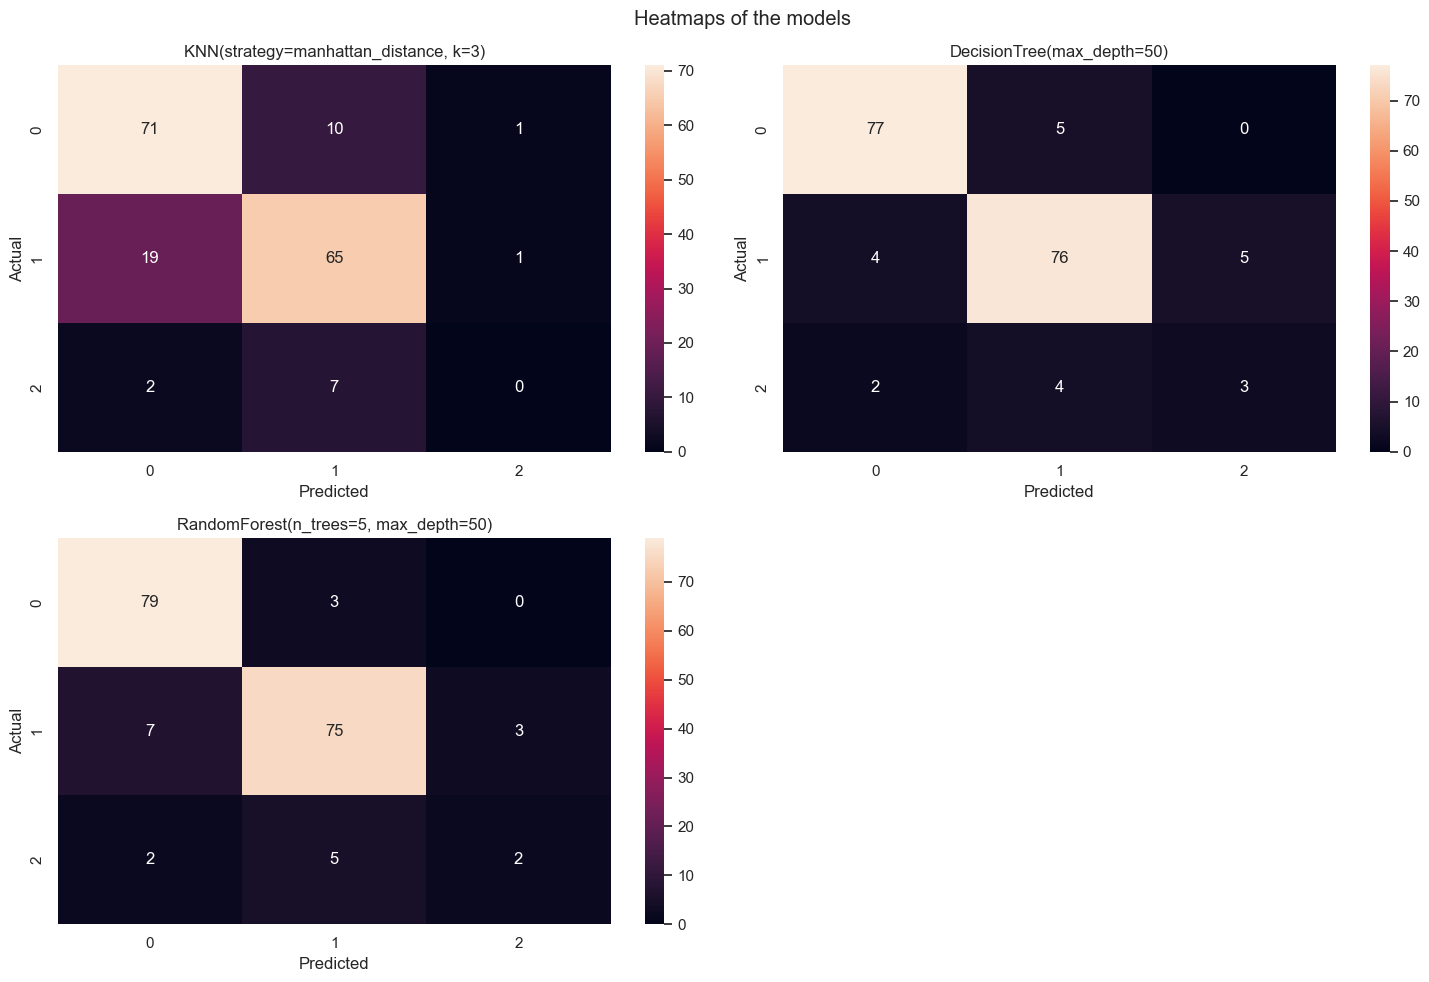

In [26]:
heatmaps(x_test=X_test, y_test=Y_test, models=models)

# test with examples

In [21]:
num_examples = 5
for i in range(num_examples):
    # get random example
    random_index = np.random.randint(0, X_test.shape[0])
    x = X_test.iloc[random_index]
    y = Y_test.iloc[random_index]
    print(f'Example {i+1}:')
    print(f'Actual class: {y}')
    for model in models:
        print(f'Prediction for {model.__class__.__name__}: {model.predict_single(x)}')

Example 1:
Actual class: 0.0
Prediction for KNN: 0.0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 2:
Actual class: 0.0
Prediction for KNN: 0.0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 3:
Actual class: 1.0
Prediction for KNN: 1.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 1
Example 4:
Actual class: 0.0
Prediction for KNN: 0.0
Prediction for DecisionTree: 0
Prediction for RandomForest: 0
Example 5:
Actual class: 1.0
Prediction for KNN: 1.0
Prediction for DecisionTree: 1
Prediction for RandomForest: 1


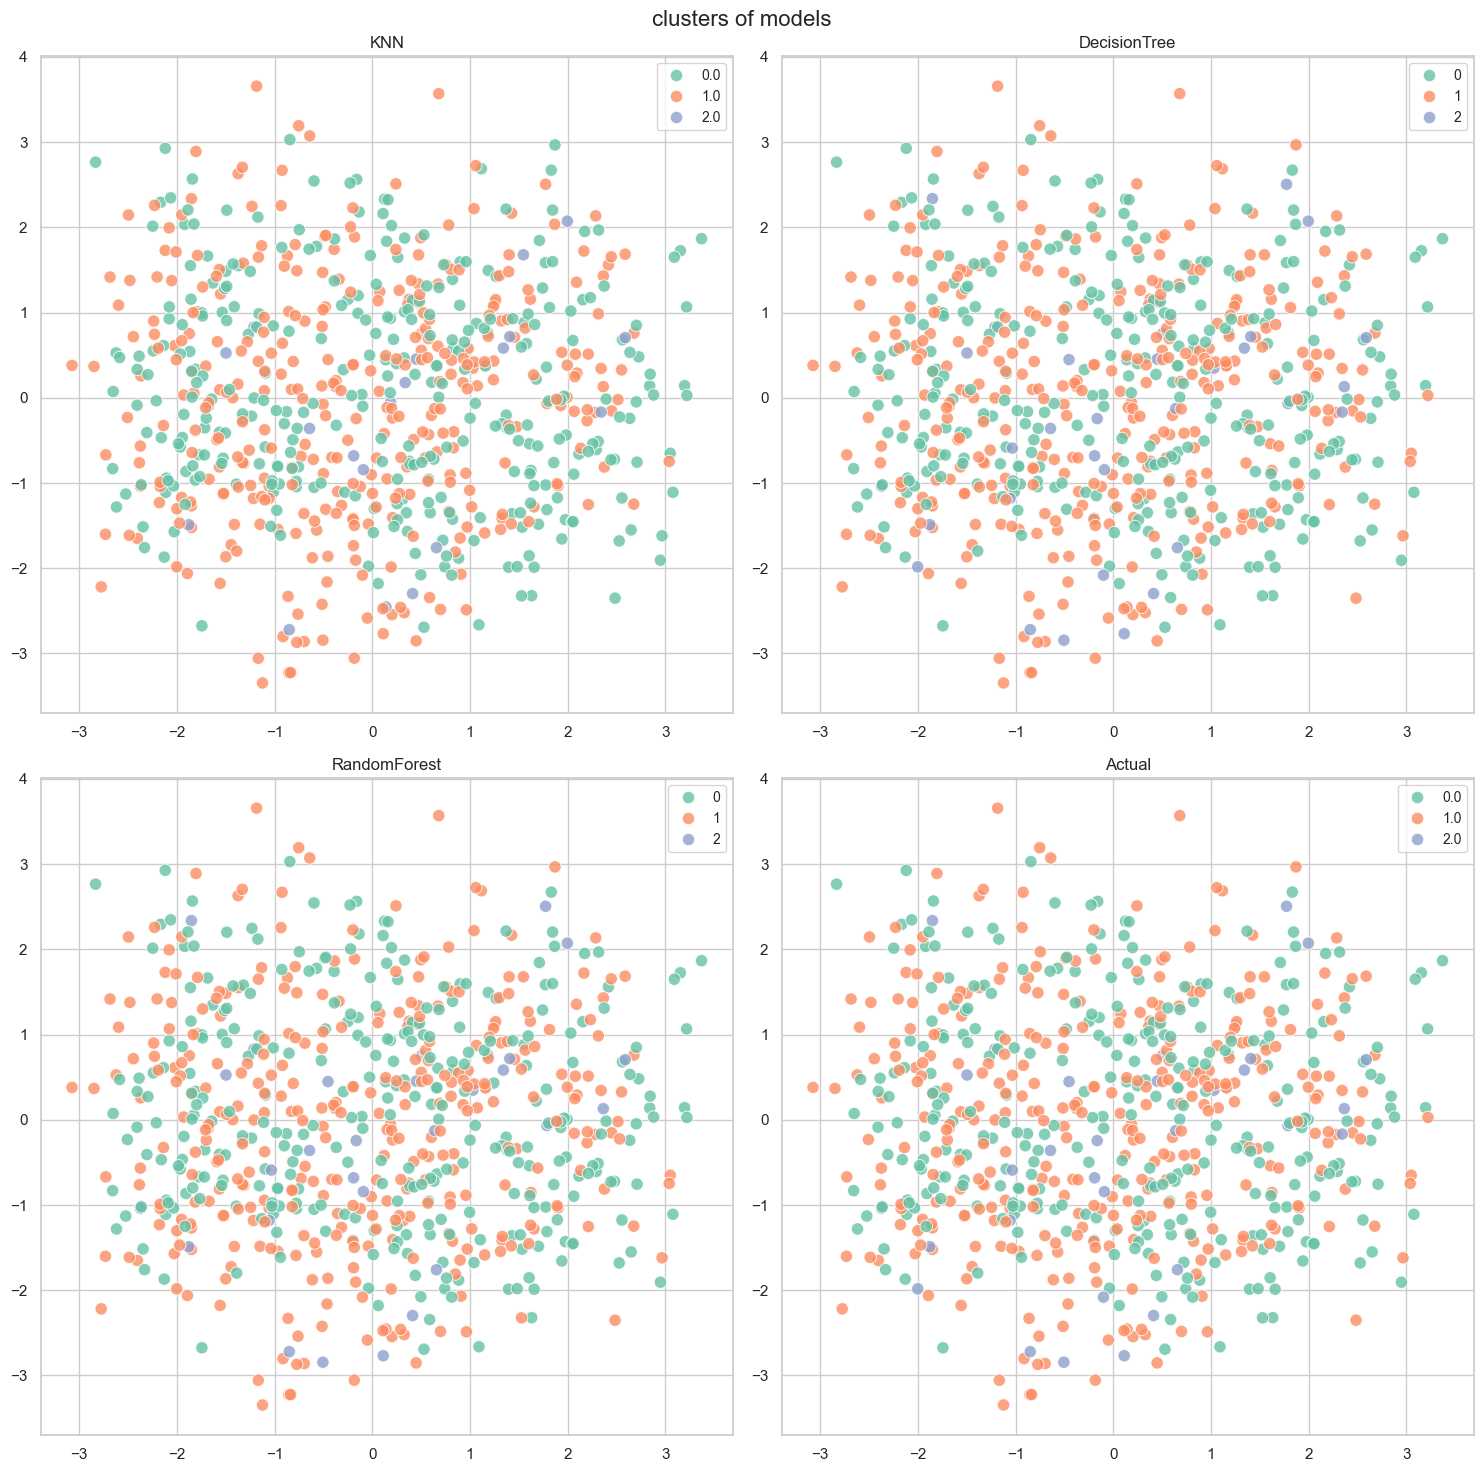

In [22]:
plot_cluster_by_model(X_train, Y_train, "clusters of models", models)